<a href="https://colab.research.google.com/github/Cv103/tensorflow_exercises/blob/main/tf_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
#creating a dataset 
nums=[68,54,856,56,9,525,56,46]
tf_data=tf.data.Dataset.from_tensor_slices(nums)
tf_data

<TensorSliceDataset shapes: (), types: tf.int32>

In [3]:
for i in tf_data:
   print(i)
   print(i.numpy())

tf.Tensor(68, shape=(), dtype=int32)
68
tf.Tensor(54, shape=(), dtype=int32)
54
tf.Tensor(856, shape=(), dtype=int32)
856
tf.Tensor(56, shape=(), dtype=int32)
56
tf.Tensor(9, shape=(), dtype=int32)
9
tf.Tensor(525, shape=(), dtype=int32)
525
tf.Tensor(56, shape=(), dtype=int32)
56
tf.Tensor(46, shape=(), dtype=int32)
46


In [4]:
#print only 2 values
for i in tf_data.take(2):
    print(i)

tf.Tensor(68, shape=(), dtype=int32)
tf.Tensor(54, shape=(), dtype=int32)


In [5]:
#applying filter function to data
tf_data=tf_data.filter(lambda x:x>=0)
for i in tf_data:
    print (i)

tf.Tensor(68, shape=(), dtype=int32)
tf.Tensor(54, shape=(), dtype=int32)
tf.Tensor(856, shape=(), dtype=int32)
tf.Tensor(56, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(525, shape=(), dtype=int32)
tf.Tensor(56, shape=(), dtype=int32)
tf.Tensor(46, shape=(), dtype=int32)


In [6]:

#applys a function to each element of data
tf_data=tf_data.map(lambda x:x*2)
for i in tf_data:
    print(i)

tf.Tensor(136, shape=(), dtype=int32)
tf.Tensor(108, shape=(), dtype=int32)
tf.Tensor(1712, shape=(), dtype=int32)
tf.Tensor(112, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(1050, shape=(), dtype=int32)
tf.Tensor(112, shape=(), dtype=int32)
tf.Tensor(92, shape=(), dtype=int32)


In [7]:

#shuffles the data
tf_data=tf_data.shuffle(buffer_size=3)
for i in tf_data:
    print(i)

tf.Tensor(136, shape=(), dtype=int32)
tf.Tensor(112, shape=(), dtype=int32)
tf.Tensor(1712, shape=(), dtype=int32)
tf.Tensor(108, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(1050, shape=(), dtype=int32)
tf.Tensor(112, shape=(), dtype=int32)
tf.Tensor(92, shape=(), dtype=int32)


In [8]:
for i in tf_data.batch(batch_size=2):
    print(i)

tf.Tensor([108 136], shape=(2,), dtype=int32)
tf.Tensor([1712   18], shape=(2,), dtype=int32)
tf.Tensor([112 112], shape=(2,), dtype=int32)
tf.Tensor([  92 1050], shape=(2,), dtype=int32)


In [9]:

#doing the above operations in a single line
tf_dataset=tf.data.Dataset.from_tensor_slices(nums)
tf_dataset=tf_dataset.filter(lambda x:x>=0).map(lambda y:y*2). shuffle (buffer_size=2)
for i in tf_dataset: 
    print (i)

tf.Tensor(136, shape=(), dtype=int32)
tf.Tensor(1712, shape=(), dtype=int32)
tf.Tensor(108, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(1050, shape=(), dtype=int32)
tf.Tensor(112, shape=(), dtype=int32)
tf.Tensor(92, shape=(), dtype=int32)
tf.Tensor(112, shape=(), dtype=int32)


In [10]:
f= open("abc.txt","w+")
for i in range(10):
     f.write("This is line %d\r\n" % (i+1))

In [11]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

(60000, 28, 28)
class :  9


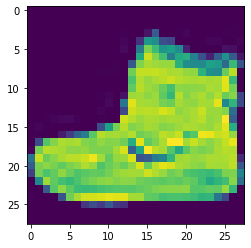

In [12]:
print(train[0].shape)
print("class : ", train[1][0])
plt.imshow(train[0][0])

In [13]:
x,y=train
print (x.shape,y.shape)
dataset=tf.data.Dataset.from_tensor_slices((x,y))

(60000, 28, 28) (60000,)


In [14]:
for data,label in dataset.take(2):
    print("data shape : ",data.shape)
    print("label : ",label.numpy())

data shape :  (28, 28)
label :  9
data shape :  (28, 28)
label :  0


label :  9


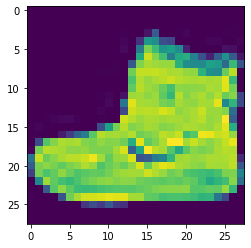

In [15]:
for data,label in dataset.take(1):
    print("label : ",label.numpy())
    plt.imshow(data)

In [16]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) // 255., label

In [17]:
data=dataset.map(normalize_img)

blank image because we normalised it took the ceil


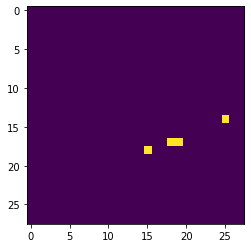

In [18]:
for x,y in data.take(1):
    print("blank image because we normalised it took the ceil")
    plt.imshow(x)

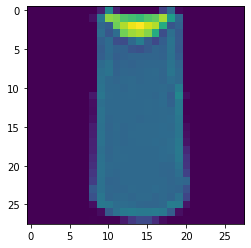

In [19]:
for x,y in dataset.batch(batch_size=3).take(1):
    plt.imshow(x[2])